In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.io
import h5py

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sys.path.append('../../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
from DataPlot_realdata import Data_Load_Plot, Result_Plot, Result_Plot_paper, Loss_Plot

def read_hdf5_mat_as_array(file_path):
    with h5py.File(file_path, 'r') as f:
        # HDF5의 모든 데이터를 numpy.array로 변환
        data = {key: np.array(f[key]) for key in f.keys()}
    return data

# 파일 경로
datapath1 = "C:/Users/stell/OneDrive/바탕 화면/PD_OpenLoop_ch12-13.mat"
datapath2 = "C:/Users/stell/OneDrive/바탕 화면/PD_rest(noStim)_ch12-13.mat"

# 데이터를 numpy.array 형식으로 로드
Contaminated_data = read_hdf5_mat_as_array(datapath1)
Clean_data = read_hdf5_mat_as_array(datapath2)
Contaminated_data = Contaminated_data['raw'].T
Clean_data = Clean_data['raw'].T

n_channels, n_samples = Contaminated_data.shape
print(Contaminated_data.shape)
mean_data = np.mean(Contaminated_data, axis=0) # len; 4000

filtered_data = np.zeros_like(Contaminated_data)
for i in range(len(Contaminated_data)):
    filtered_data[i, :] = Contaminated_data[i, :] - mean_data[:]

# print(len(mean_data), during_data.shape) # 4000 (32, 4000)

# 채널 정보
stim_ch = 11
target_ch = 12

fs = 24414  # 샘플링 주파수
frequencies = np.linspace(-fs/2, fs/2, n_samples)  # 주파수 범위 설정
time = np.arange(n_samples) / fs # 시간 범위 설정

(16, 7324200)


C:\Users\stell\AppData\Local\Temp\ipykernel_9848\3461855927.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\stell\anaconda3\envs\torch1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


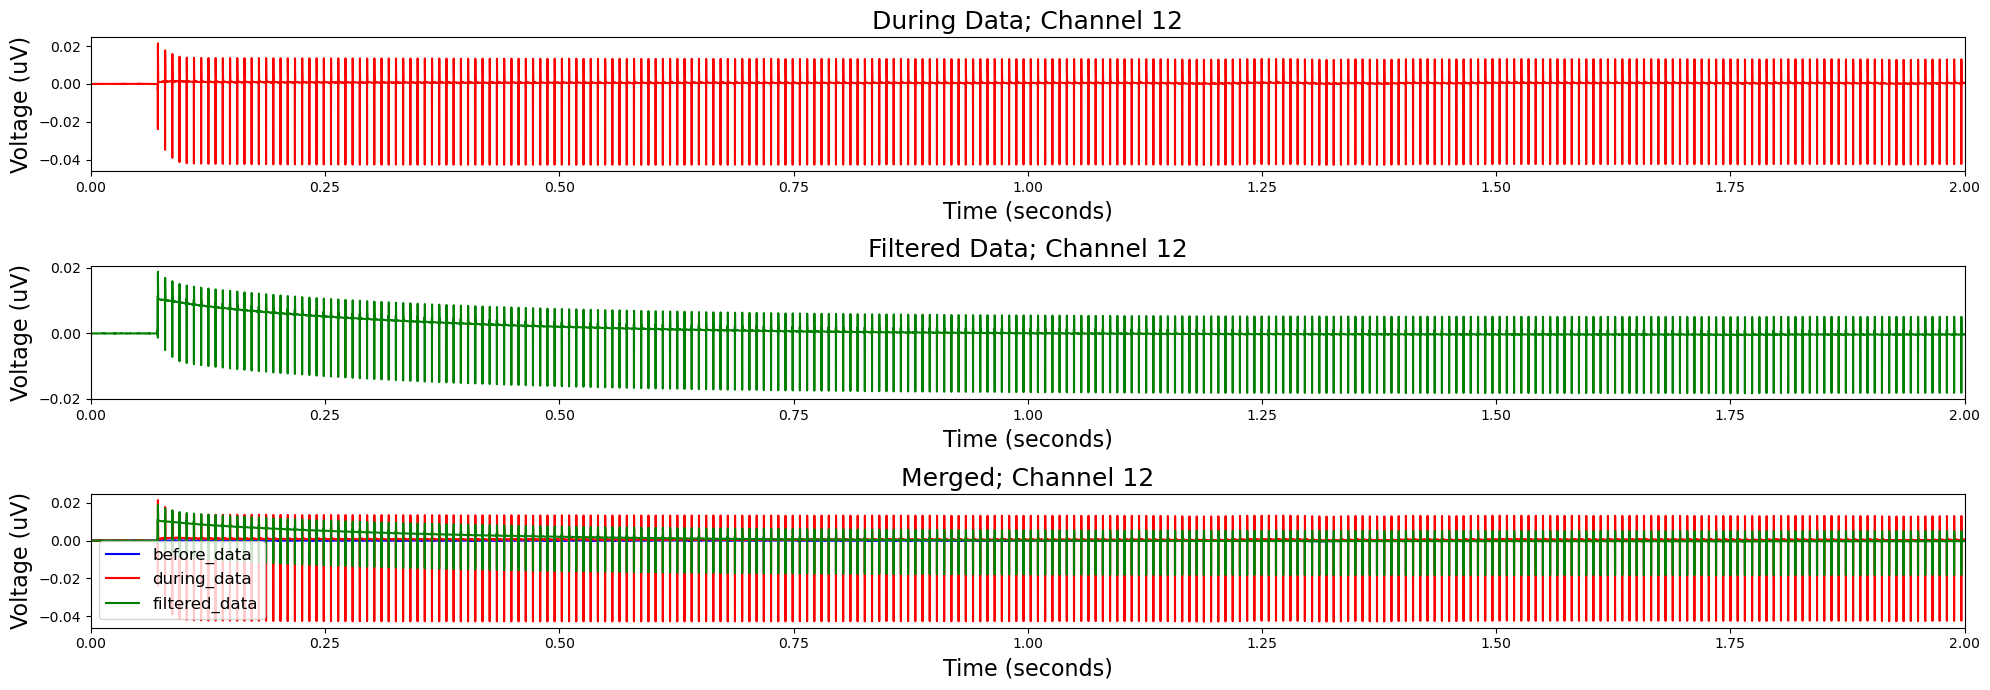

In [2]:
# 결과 플로팅 - 내가 볼 채널만
plt.figure(figsize=(20, 7))

# 원본 데이터
plt.subplot(3, 1, 1)
plt.plot(time, Contaminated_data[target_ch, :], 'r')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'During Data; Channel {target_ch}', fontsize=18)

# 필터된 데이터
plt.subplot(3, 1, 2)
plt.plot(time, filtered_data[target_ch, :], 'g')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Filtered Data; Channel {target_ch}', fontsize=18)

# Time domain
plt.subplot(3, 1, 3)
plt.plot(time, Clean_data[target_ch, :], 'b', label='before_data')
plt.plot(time, Contaminated_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Merged; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\stell\AppData\Local\Temp\ipykernel_9848\3548302288.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


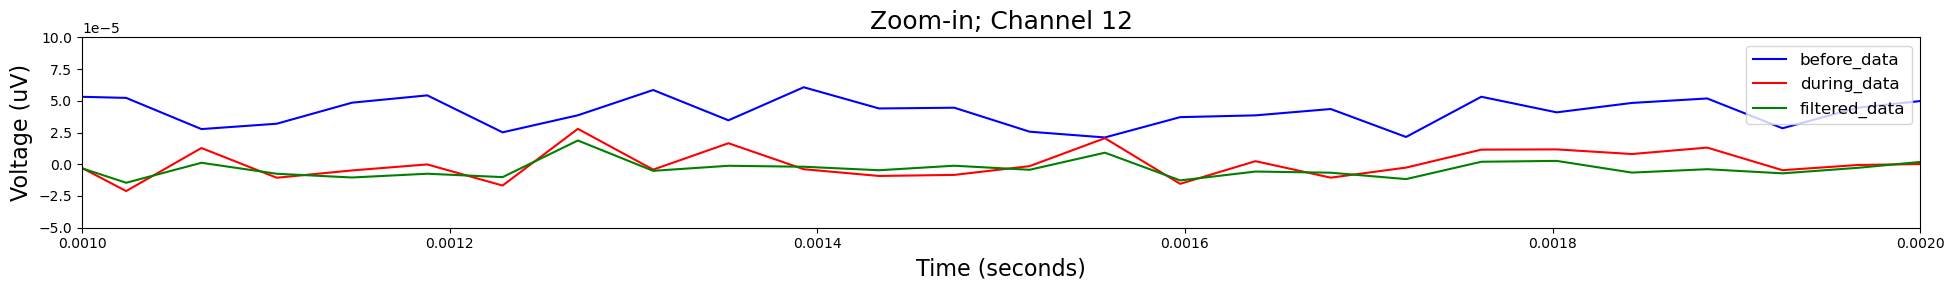

In [9]:
# 결과 플로팅 - 줌인
plt.figure(figsize=(20, 3))

start_t = 0.001
end_t = 0.002

plt.plot(time, Clean_data[target_ch, :], 'b', label='before_data')
plt.plot(time, Contaminated_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(start_t, end_t)
plt.ylim(-0.00005, 0.0001)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Zoom-in; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [4]:
print(Contaminated_data.shape)

(16, 7324200)


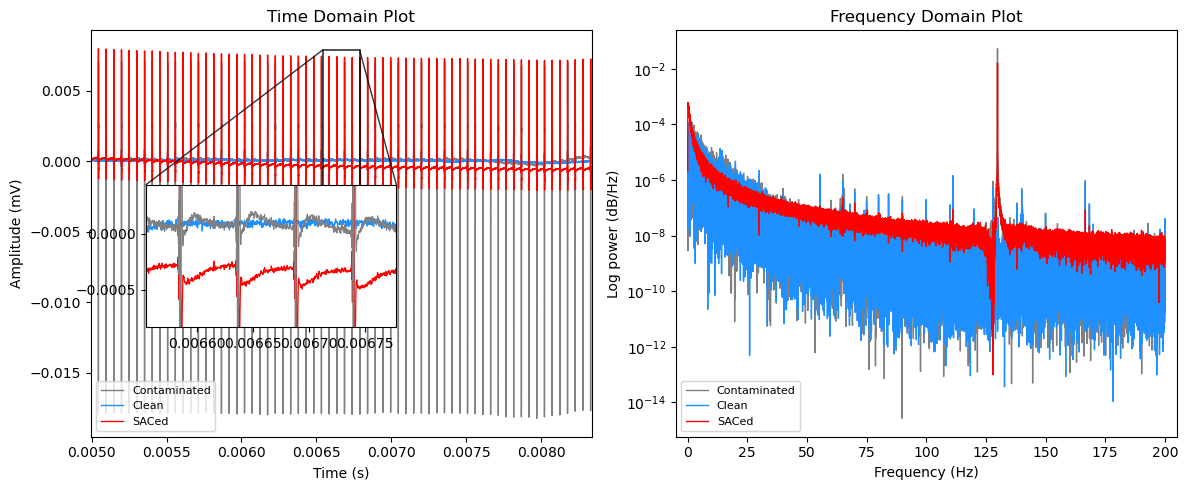

< MSE >
Time Domain MSE: 6.106008186179679e-06 ± 9.337576557300054e-06
Frequency Domain MSE: 2.1782159819849767e-05 ± 5.480528488988057e-05
Time + Frequency MSE: 950118.4375 ± 2353543.75


In [5]:
Result_Plot(Contaminated_data, filtered_data, Clean_data) # inverse scaled data를 input으로 넣음

#Result_Plot_paper(Contaminated_data, filtered_data,Clean_data, save_path, save_title) # inverse scaled data를 input으로 넣음